In [68]:
from sklearn import preprocessing

from dataset import *
from models.base_model import *
from models.neural_net import *
from models.sampled_net import *
from viewer.visualisator import *
from logic import *
import dataset
import models.base_model
import models.neural_net
import models.sampled_net
import viewer.visualisator
import logic

import importlib
from sklearn.pipeline import Pipeline
from swimnetworks import Dense, Linear

importlib.reload(dataset)
importlib.reload(models.base_model)
importlib.reload(models.neural_net)
importlib.reload(models.sampled_net)
importlib.reload(viewer.visualisator)
importlib.reload(logic)

<module 'logic' from 'c:\\Users\\daydo\\OneDrive\\Dokumente\\temp-sampled\\sampled-networks\\logic.py'>

In [69]:
xd = 2  # Input space dimensions
yd = 4  # Output dimension
num_samples = 30  # Number of data points
layer_width = 20

dataset = Dataset()
dataset.create_dataset_Barron(xd, num_samples)
dataset.scale(preprocessing.MinMaxScaler())
dataset.split_train_test(0.2)

In [70]:
steps = [
    (
        "dense",
        Dense(
            layer_width=layer_width,
            activation="relu",
            parameter_sampler="relu",
            random_seed=42,
        ),
    ),
    ("linear", Linear(regularization_scale=1e-10)),
]
model_swim = Pipeline(steps)

model_swim.fit(dataset.X_train, dataset.y_train)

model_base = BaseModel()
model_base.weights = [
    model_swim.get_params()["steps"][0][1].weights,
    model_swim.get_params()["steps"][1][1].weights,
]
model_base.biases = [
    -model_swim.get_params()["steps"][0][1].biases[0],
    -model_swim.get_params()["steps"][1][1].biases[0],
]


y_predict = model_base.predict(dataset.X_test)
y_swim = model_swim.predict(dataset.X_test)

print(f"Predictions from 'model_base' and 'model_swim' are equal: {np.array_equal(y_predict, y_swim)}")

Predictions from 'model_base' and 'model_swim' are equal: True


In [71]:
# model_adam = NeuralNet()
# model_adam.fit(dataset.X_train, dataset.y_train, [layer_width])

# model_base = model_adam

Layer1 sampling: 100%|██████████| 20/20 [00:00<00:00, 4001.63it/s]


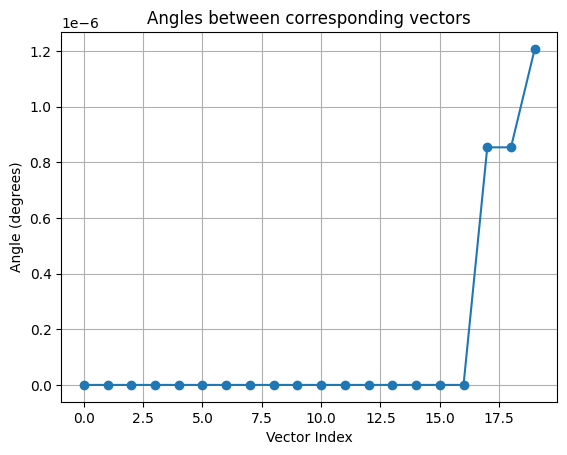

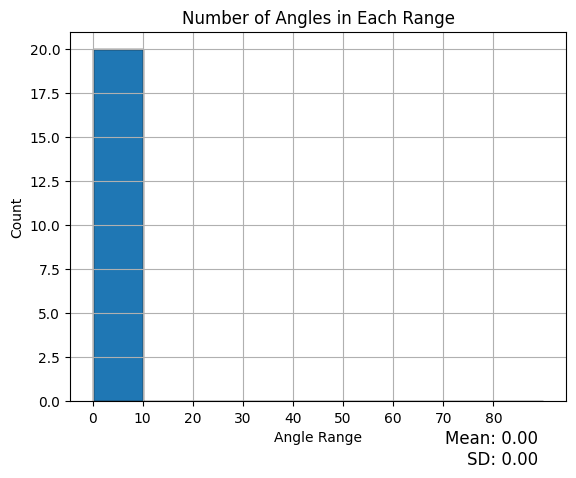

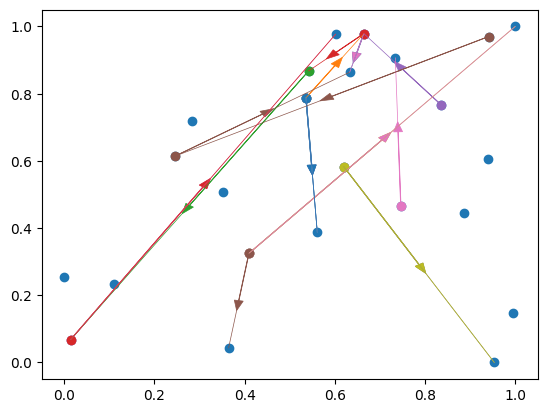

In [72]:
weights_l1, biases_l1, x_1_x2_tuples = compute_weights_biases_layer1(
    dataset.X_train, model_base.weights, model_base.biases
)

plot_vector_differences(weights_l1.T, model_base.weights[0].T)

plot_weight_vectors_and_point_pairs(dataset.X_train, x_1_x2_tuples, np.transpose(model_base.weights[0]))